In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.dropna(inplace=True)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from sklearn.preprocessing import StandardScaler
df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)





In [3]:

normal_test_columns = df.columns

#shapiro test
from scipy.stats import shapiro
shapiro_alpha_h0 = []
shapiro_twoalpha_h0 = []
for col in df[normal_test_columns]:
    stat, p = shapiro(df[col])
    print(f'{col} -> Statistics={stat}, p={p}')
    #print column name
    alpha = 0.05
    if p > alpha:
        shapiro_alpha_h0.append(col)

age -> Statistics=0.9447009637825445, p=5.69204692845418e-22
bmi -> Statistics=0.9938864621676107, p=2.6046836879834408e-05
children -> Statistics=0.823180467362945, p=5.066436570900864e-36
charges -> Statistics=0.8146881157362383, p=1.1505226334932036e-36


In [4]:
shapiro_alpha_h0

[]

In [5]:
from scipy.stats import ttest_ind
import pandas as pd

# Assuming df is a DataFrame and shapiro_alpha_h0 is a list of column names
for col1 in df.columns:
    for col2 in df.columns:
        data1 = pd.to_numeric(df[col1], errors='coerce').dropna()
        data2 = pd.to_numeric(df[col2], errors='coerce').dropna()
        stat, p = ttest_ind(data1, data2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')

stat=0.000, p=1.000
Probably the same distribution
stat=20.404, p=0.000
Probably different distributions
stat=98.861, p=0.000
Probably different distributions
stat=-39.965, p=0.000
Probably different distributions
stat=-20.404, p=0.000
Probably different distributions
stat=0.000, p=1.000
Probably the same distribution
stat=173.993, p=0.000
Probably different distributions
stat=-39.991, p=0.000
Probably different distributions
stat=-98.861, p=0.000
Probably different distributions
stat=-173.993, p=0.000
Probably different distributions
stat=0.000, p=1.000
Probably the same distribution
stat=-40.080, p=0.000
Probably different distributions
stat=39.965, p=0.000
Probably different distributions
stat=39.991, p=0.000
Probably different distributions
stat=40.080, p=0.000
Probably different distributions
stat=0.000, p=1.000
Probably the same distribution


In [6]:
from scipy.stats import ttest_rel


for col1 in df.columns:
    for col2 in df.columns:
        data1 = pd.to_numeric(df[col1], errors='coerce').dropna()
        data2 = pd.to_numeric(df[col2], errors='coerce').dropna()
        stat, p = ttest_rel(data1, data2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')

stat=nan, p=nan
Probably different distributions
stat=21.271, p=0.000
Probably different distributions
stat=99.220, p=0.000
Probably different distributions
stat=-39.979, p=0.000
Probably different distributions
stat=-21.271, p=0.000
Probably different distributions
stat=nan, p=nan
Probably different distributions
stat=174.417, p=0.000
Probably different distributions
stat=-39.995, p=0.000
Probably different distributions
stat=-99.220, p=0.000
Probably different distributions
stat=-174.417, p=0.000
Probably different distributions
stat=nan, p=nan
Probably different distributions
stat=-40.081, p=0.000
Probably different distributions
stat=39.979, p=0.000
Probably different distributions
stat=39.995, p=0.000
Probably different distributions
stat=40.081, p=0.000
Probably different distributions
stat=nan, p=nan
Probably different distributions


In [7]:
from scipy.stats import f_oneway

for col1 in df.columns:
    for col2 in df.columns:
        data1 = pd.to_numeric(df[col1], errors='coerce').dropna()
        data2 = pd.to_numeric(df[col2], errors='coerce').dropna()
        stat, p = f_oneway(data1, data2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')

stat=0.000, p=1.000
Probably the same distribution
stat=416.325, p=0.000
Probably different distributions
stat=9773.416, p=0.000
Probably different distributions
stat=1597.224, p=0.000
Probably different distributions
stat=416.325, p=0.000
Probably different distributions
stat=0.000, p=1.000
Probably the same distribution
stat=30273.640, p=0.000
Probably different distributions
stat=1599.289, p=0.000
Probably different distributions
stat=9773.416, p=0.000
Probably different distributions
stat=30273.640, p=0.000
Probably different distributions
stat=0.000, p=1.000
Probably the same distribution
stat=1606.441, p=0.000
Probably different distributions
stat=1597.224, p=0.000
Probably different distributions
stat=1599.289, p=0.000
Probably different distributions
stat=1606.441, p=0.000
Probably different distributions
stat=-0.000, p=nan
Probably different distributions


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Example data: each subject measured under 3 conditions
data = pd.DataFrame({
    'Subject': np.tile(np.arange(1, 11), 3),
    'Condition': np.repeat(['A', 'B', 'C'], 10),
    'Score': np.concatenate([
        5 * np.random.randn(10) + 50,
        5 * np.random.randn(10) + 52,
        5 * np.random.randn(10) + 54
    ])
})

# Fit the repeated measures ANOVA model
model = AnovaRM(data, 'Score', 'Subject', within=['Condition'])
results = model.fit()

# Print the results
print(results)


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Condition  3.7941 2.0000 18.0000 0.0422



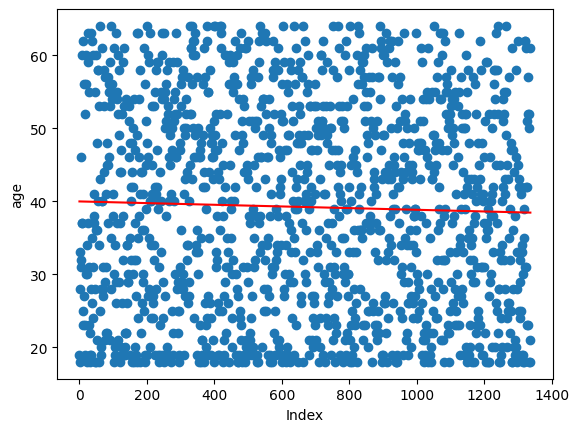

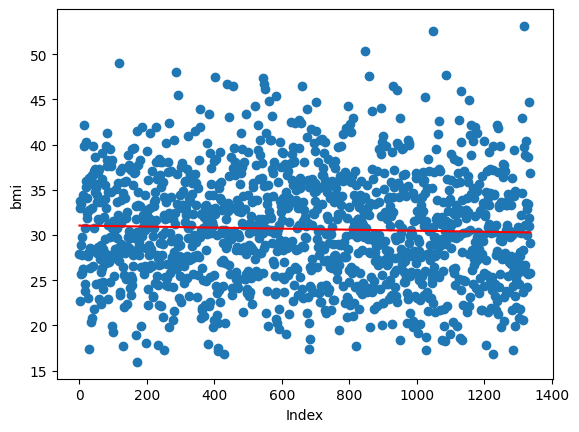

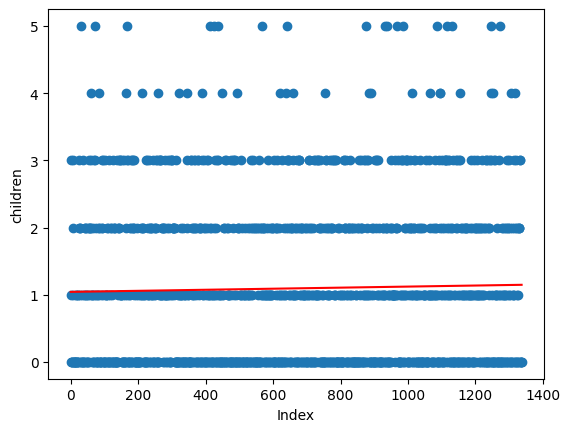

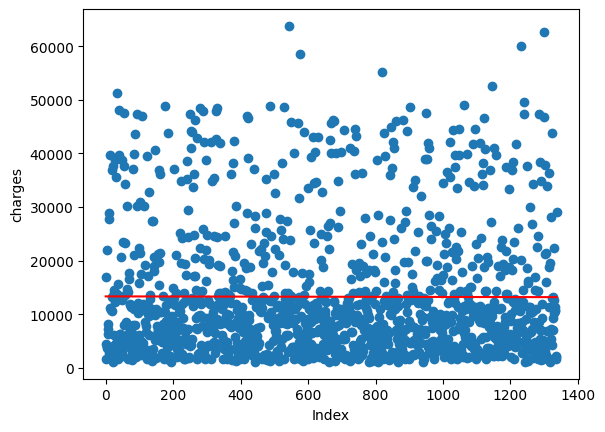

In [9]:
#parameter Estimation plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Assuming df is a DataFrame
for col in df.columns:
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    X = data.index.values.reshape(-1, 1)
    y = data.values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

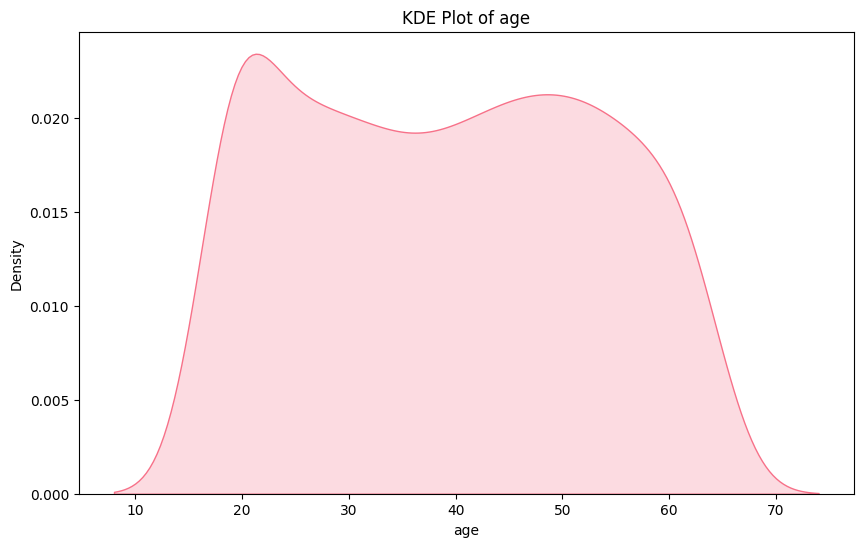

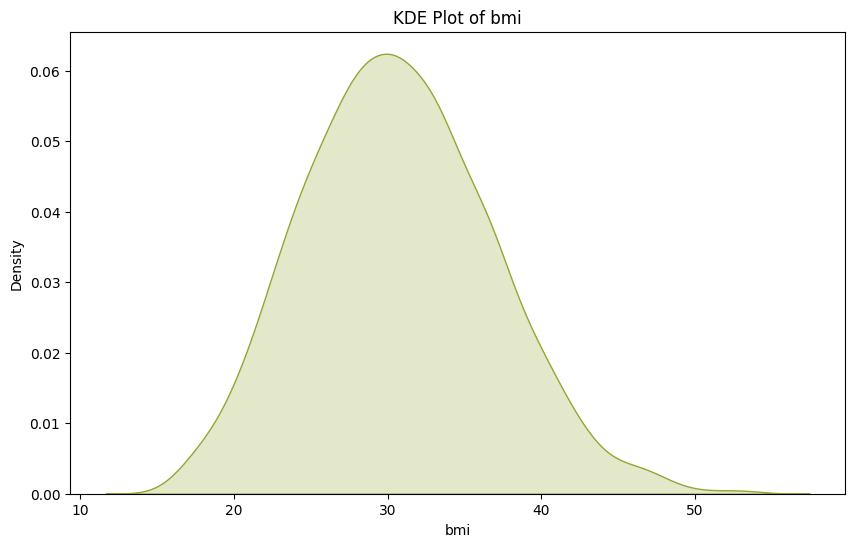

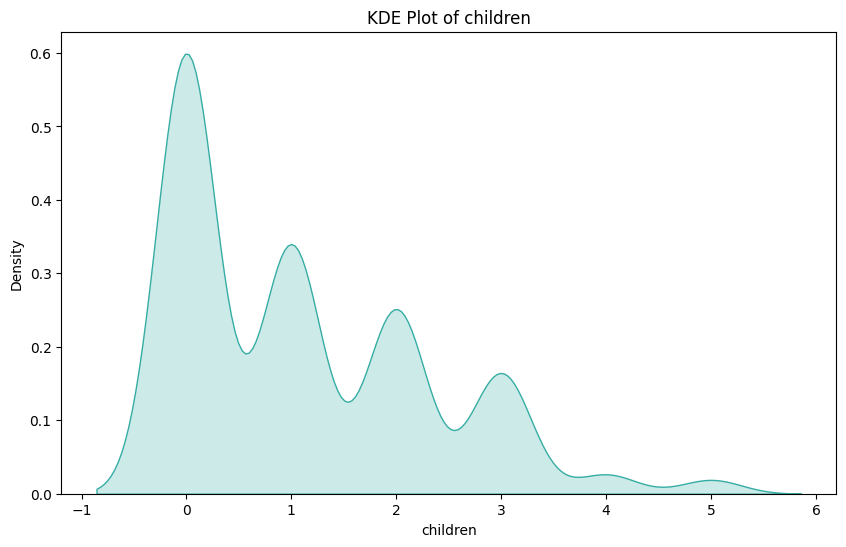

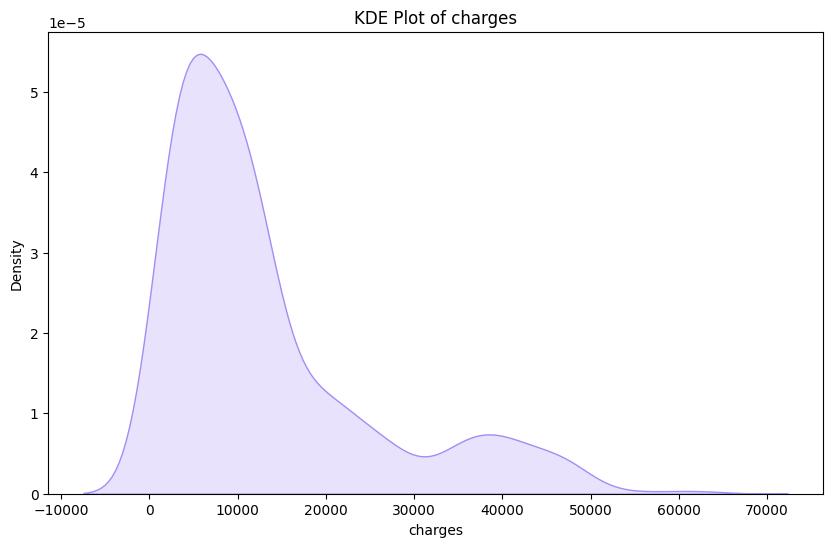

In [10]:
# If you have a categorical column, use it for hue
df_numeric = df.select_dtypes(include=['float64', 'int64'])

colors = sns.color_palette('husl', n_colors=len(df_numeric.columns))  # Generate a color palette
for col, color in zip(df_numeric.columns, colors):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_numeric[col], fill=True, color=color)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()